In [19]:
from __future__ import print_function
import keras
import numpy as np
from PIL import Image
from keras.datasets import mnist
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from utils.custom_generator import custom_image_generator
from utils.image import ImageDataGenerator
from matplotlib.pyplot import imshow

In [9]:
# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

11501568/11490434 [==============================] - 2s 0us/step
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [ ]:
num_classes = 10
# mnist model - can add also the functional version of it to show the differences between sequential and functional model building
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])


In [ ]:
model.summary()


In [ ]:
train_batch_size = 128
val_batch_size = 64

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


In [ ]:
train_generator =  custom_image_generator(
    ImageDataGenerator(rescale=1./255),
    x_train, y_train,
    seed=1,  # Use a specific random seed
    batch_size=train_batch_size,  # Use batch size of 128
    )

validation_generator =  custom_image_generator(
    ImageDataGenerator(rescale=1./255),
    x_test, y_test,
    seed=1,  # Use a specific random seed
    batch_size=val_batch_size,  #Use batch size of 64
    )

In [ ]:

epochs = 12

model.fit_generator(
    generator=train_generator,
    steps_per_epoch=x_train.shape[0] // train_batch_size,
    validation_data = validation_generator,
    validation_steps=x_test.shape[0] // val_batch_size,
    epochs=epochs
    )


In [ ]:
model.save('models/mnist_model.h5')

In [80]:
# load pre-trained model
model = load_model('models/mnist_model.h5')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
__________

img_height 1300
img_width 1300
(1, 28, 28, 1)


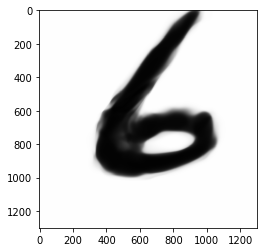

In [78]:
# load image
img = Image.open('images/mnist_img_2.png')
imshow(img)
print ('img_height', img.size[0])
print ('img_width', img.size[1])
# convert to grayscale and reshape the array to the network input
resized_img = img.resize((img_cols, img_rows))
resized_img = resized_img.convert('L')
resized_img = np.asarray(resized_img, dtype=np.float32)
resized_img = np.expand_dims(resized_img, axis=0)
resized_img = np.expand_dims(resized_img, axis=3)
print(resized_img.shape)

In [77]:
# predict number based on the network output
out = model.predict(resized_img)
print("This number is", out.argmax())

This number is 6
